# 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions
from sklearn.ensemble import IsolationForest

# 2. Read the training data

In [3]:
file_path = r"C:\Users\DELL\Desktop\Programming\ml-project2-flight-price-prediction-using-aws-sagemaker\data\train.csv"

train = pd.read_csv(file_path)

In [4]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-15,Mumbai,Hyderabad,19:30:00,20:45:00,75,0.0,No Info,3100
1,Jet Airways,2019-06-27,Delhi,Cochin,13:25:00,19:00:00,1775,2.0,No Info,12819
2,Jet Airways,2019-06-03,Delhi,Cochin,21:25:00,19:00:00,1295,2.0,No Info,13292
3,Jet Airways,2019-04-01,Kolkata,Banglore,06:30:00,04:40:00,1330,1.0,In-Flight Meal Not Included,7064
4,Air India,2019-05-18,Kolkata,Banglore,16:50:00,13:45:00,1255,2.0,No Info,13432
...,...,...,...,...,...,...,...,...,...,...
6271,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6272,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6273,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-Flight Meal Not Included,10262
6274,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


In [5]:
# checking the types

train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
# correcting  the dtypes of date_of_journey, dep_time, arrival_time

train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
}
)

In [7]:
# again checking the dtype
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

# 3. High level summary of data

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6276 non-null   object        
 1   date_of_journey  6276 non-null   datetime64[ns]
 2   source           6276 non-null   object        
 3   destination      6276 non-null   object        
 4   dep_time         6276 non-null   datetime64[ns]
 5   arrival_time     6276 non-null   datetime64[ns]
 6   duration         6276 non-null   int64         
 7   total_stops      6275 non-null   float64       
 8   additional_info  6276 non-null   object        
 9   price            6276 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 490.4+ KB


In [9]:
train.describe(include = "number")  # total steps is categrical (behavior)

,duration,total_stops,price
count,6276.000000,6275.000000,6276.000000
mean,633.123805,0.800159,9032.109783
std,503.633196,0.659571,4663.686031
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5200.500000
50%,505.000000,1.000000,8283.000000
75%,925.000000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [10]:
(
    train
    # .assign(total_steps = train["total_steps"].astype(object))
    .describe(include = "O")
)

,airline,source,destination,additional_info
count,6276,6276,6276,6276
unique,9,5,6,7
top,Jet Airways,Delhi,Cochin,No Info
freq,2240,2565,2565,4928


# 4. high level analysis of missing values

In [11]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.015934


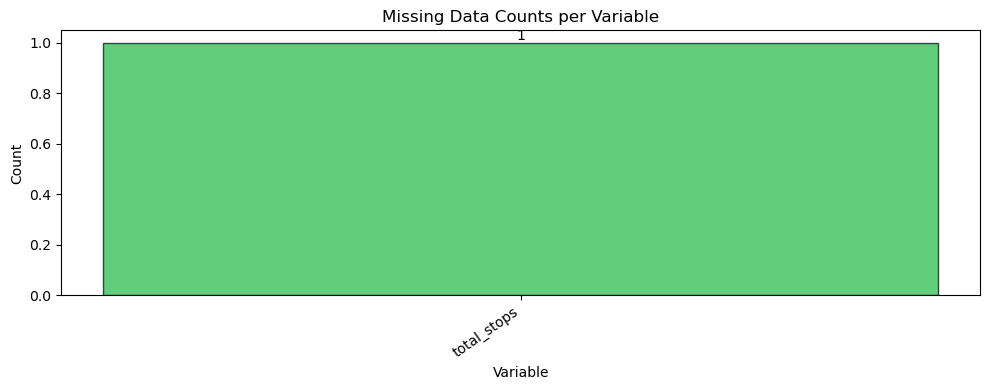

In [12]:
eda_helper_functions.plot_missing_info(train)

# 5. High level analysis of outliers

In [13]:
forest = IsolationForest(n_estimators = 10, random_state = 42)

In [14]:
(
    train
    .assign(outlier  = forest.fit_predict(train
                                          .drop(columns = "price")
                                          .select_dtypes(include = 'number')))
    .query('outlier == -1')
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Air India,2019-05-15,Mumbai,Hyderabad,2026-01-16 19:30:00,2026-01-16 20:45:00,75,0.0,No Info,3100,-1
1,Jet Airways,2019-06-27,Delhi,Cochin,2026-01-16 13:25:00,2026-01-16 19:00:00,1775,2.0,No Info,12819,-1
2,Jet Airways,2019-06-03,Delhi,Cochin,2026-01-16 21:25:00,2026-01-16 19:00:00,1295,2.0,No Info,13292,-1
4,Air India,2019-05-18,Kolkata,Banglore,2026-01-16 16:50:00,2026-01-16 13:45:00,1255,2.0,No Info,13432,-1
6,Air India,2019-06-09,Kolkata,Banglore,2026-01-16 16:50:00,2026-01-16 05:35:00,765,2.0,No Info,11642,-1
...,...,...,...,...,...,...,...,...,...,...,...
6268,Air India,2019-06-06,Kolkata,Banglore,2026-01-16 05:50:00,2026-01-16 08:55:00,1625,2.0,No Info,12723,-1
6269,Jet Airways,2019-06-15,Delhi,Cochin,2026-01-16 21:25:00,2026-01-16 12:35:00,910,2.0,In-Flight Meal Not Included,9905,-1
6270,Indigo,2019-03-03,Mumbai,Hyderabad,2026-01-16 09:10:00,2026-01-16 10:40:00,90,0.0,No Info,5755,-1
6271,Jet Airways,2019-03-21,Delhi,Cochin,2026-01-16 10:45:00,2026-01-16 18:50:00,1925,2.0,No Info,11093,-1


# 6. Pair plot

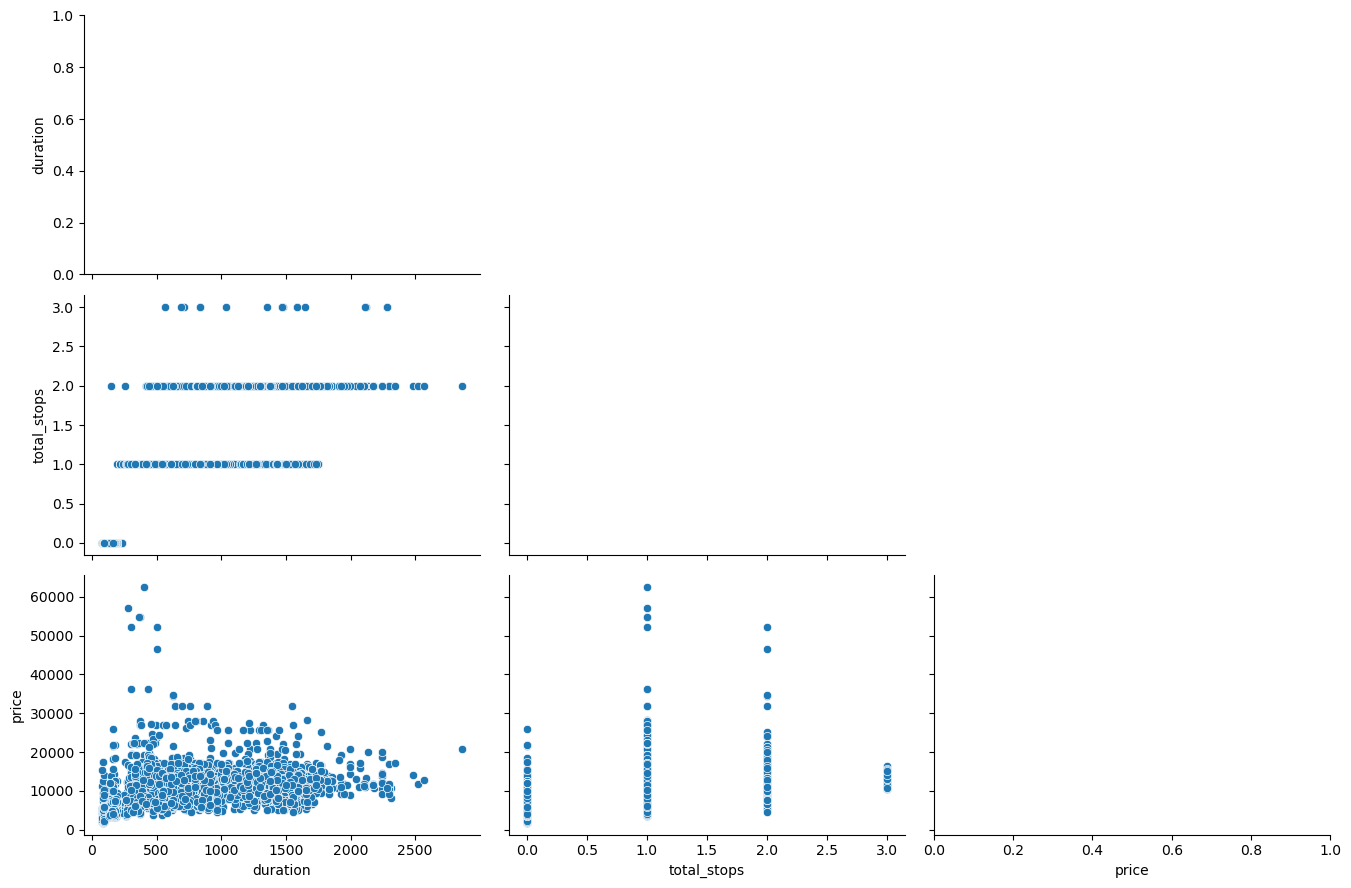

In [15]:
eda_helper_functions.pair_plots(train)

# 7. Correlation analysis

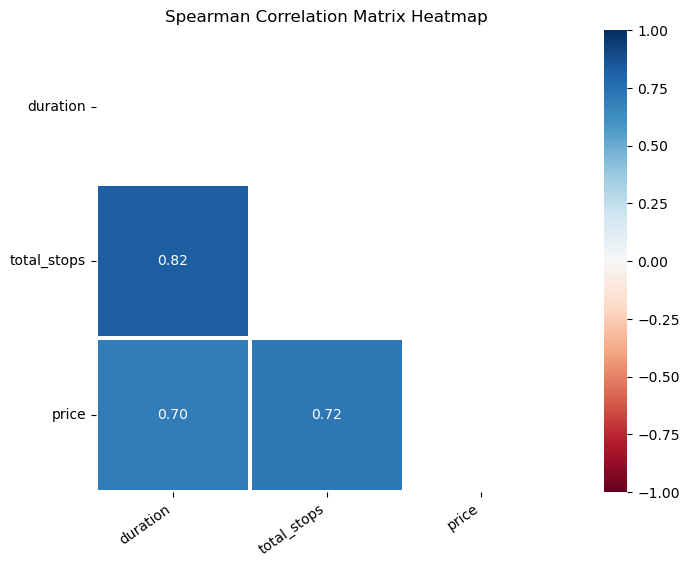

In [16]:
# numerical feature analysis

eda_helper_functions.correlation_heatmap(train)

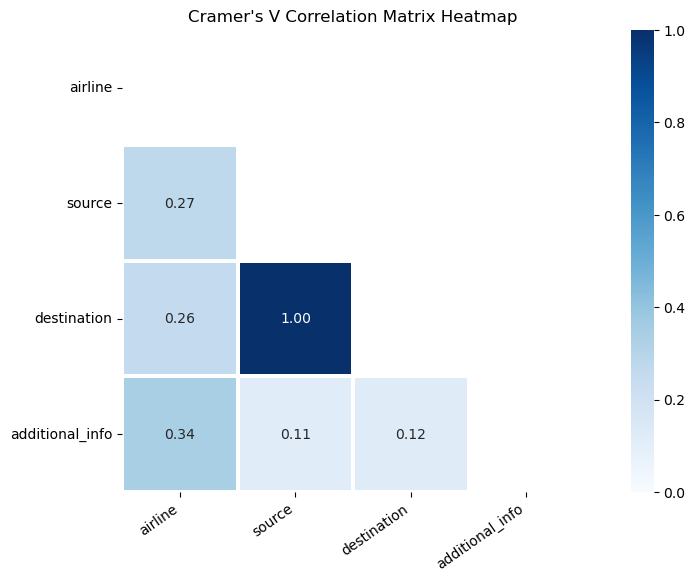

In [17]:
# categorical feature analysis

eda_helper_functions.cramersV_heatmap(train)

# 8. Detailed analysis

In [18]:
# first get the name of all features

train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 8.1 airline

In [19]:
eda_helper_functions.cat_summary(train, "airline")

0         Air India
1       Jet Airways
2       Jet Airways
3       Jet Airways
4         Air India
           ...     
6271    Jet Airways
6272      Air India
6273    Jet Airways
6274       Air Asia
6275      Air India
Name: airline, Length: 6276, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,276 / 6,276 rows


,
count,6276
unique,9
top,Jet Airways
freq,2240


,count,percentage
category,,
Jet Airways,2240,0.356915
Indigo,1221,0.194551
Air India,1010,0.160931
Multiple Carriers,688,0.109624
Spicejet,501,0.079828
Vistara,298,0.047482
Air Asia,200,0.031867
Goair,117,0.018642
Trujet,1,0.000159


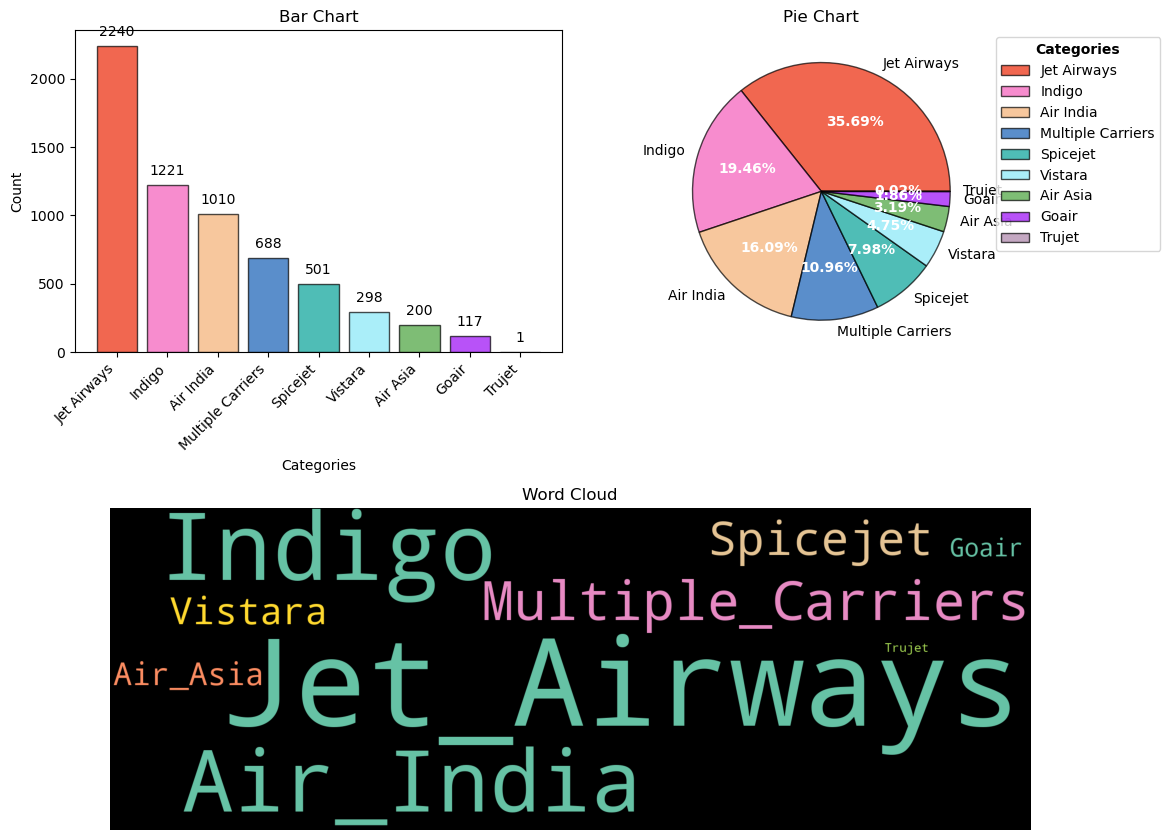

In [20]:
eda_helper_functions.cat_univar_plots(train, "airline")

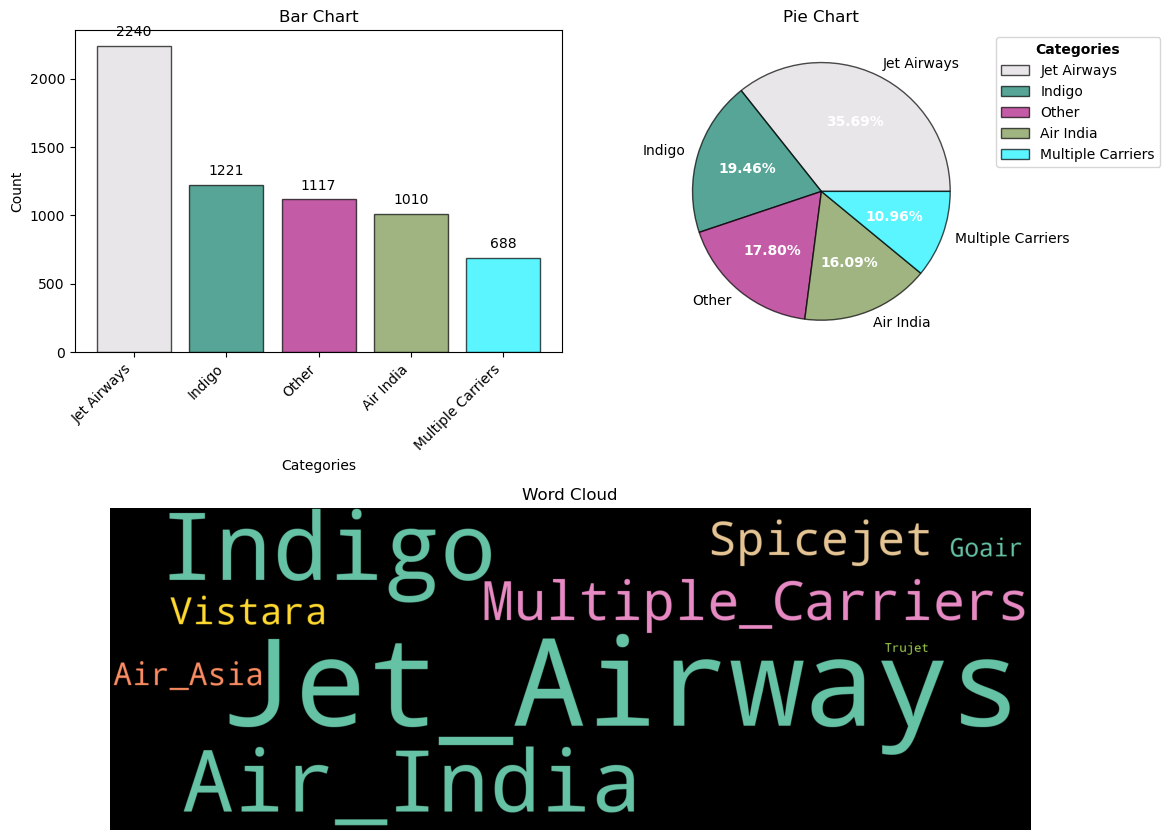

In [21]:
# getting top 4 airlines
eda_helper_functions.cat_univar_plots(train, "airline", k = 4)

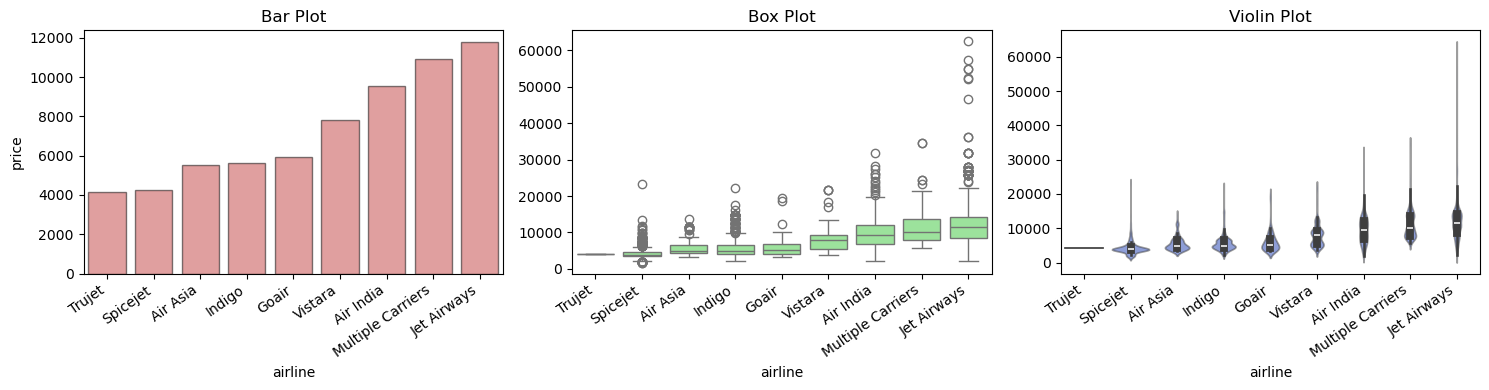

In [22]:
# bivariate analysis between airline and price

eda_helper_functions.num_cat_bivar_plots(
    data = train,
    num_var = "price",
    cat_var = "airline"
)

In [23]:
# checking if there any relationship between price and airline

eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 442.7110019712915
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2944.9677226432846
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


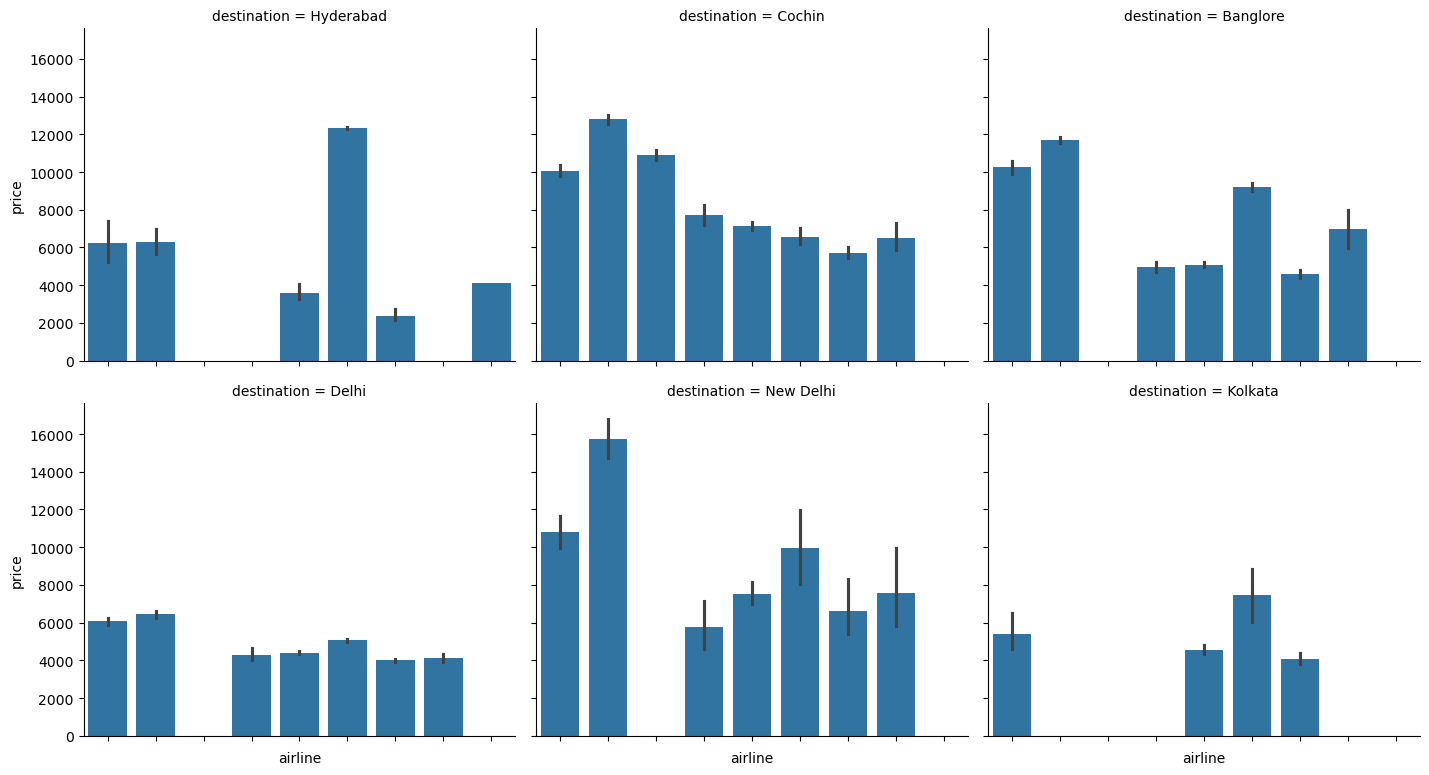

In [24]:
# multivariate analysis between airline destination and price

# making the grid
airline_grid = sns.FacetGrid(
    data = train,
    col = "destination",
    col_wrap = 3,
    height=4,
    aspect=1.2,
    sharey = True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes:
    eda_helper_functions.rotate_xlabels(ax)

## 8.2 date_of_journey

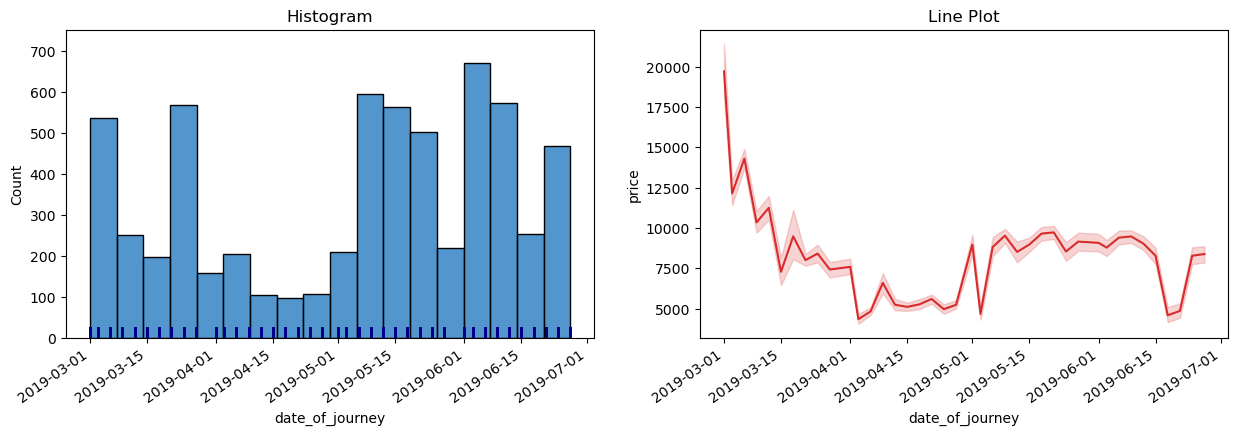

In [25]:
eda_helper_functions.dt_univar_plots(
    data = train,
    var = "date_of_journey",
    target = "price"
)

<Axes: xlabel='month'>

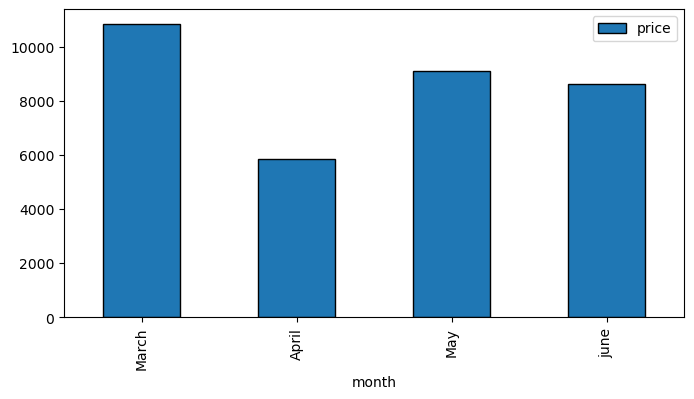

In [26]:
# calculating month wise price mean
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M")) # monthly basis price mean
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "june"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)

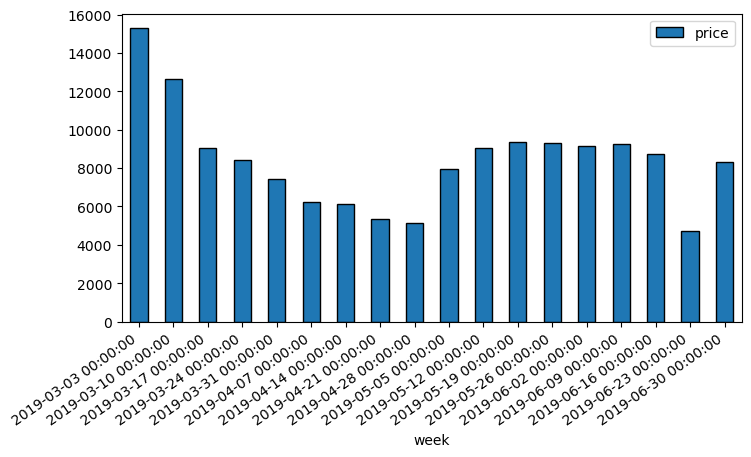

In [31]:
# calculating week wise price mean
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="week")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

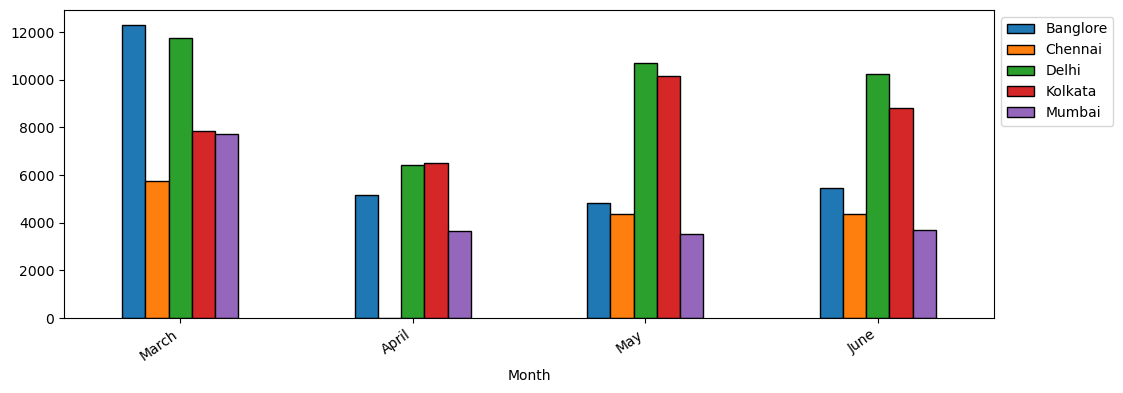

In [44]:
# multivariate analysis of destination price and date_of_journey

(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="Month")
    .plot(
        kind="bar",
        figsize=(12,4),
        edgecolor="black"
    )
)

ax = plt.gca()
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1,1)
)

eda_helper_functions.rotate_xlabels(ax)

## 8.3 dep_time

In [45]:
train.dep_time

0      2026-01-16 19:30:00
1      2026-01-16 13:25:00
2      2026-01-16 21:25:00
3      2026-01-16 06:30:00
4      2026-01-16 16:50:00
               ...        
6271   2026-01-16 10:45:00
6272   2026-01-16 09:25:00
6273   2026-01-16 14:00:00
6274   2026-01-16 07:55:00
6275   2026-01-16 11:50:00
Name: dep_time, Length: 6276, dtype: datetime64[ns]

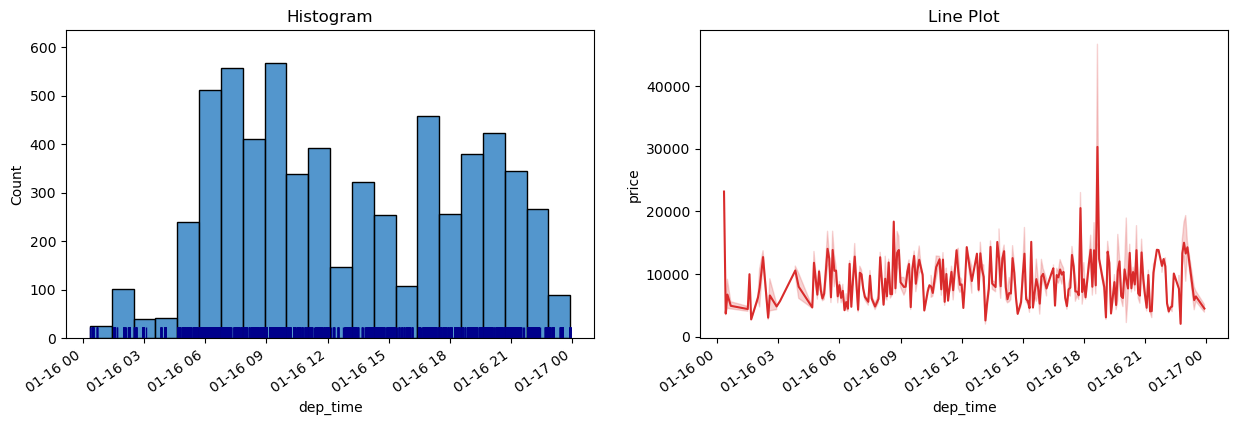

In [46]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

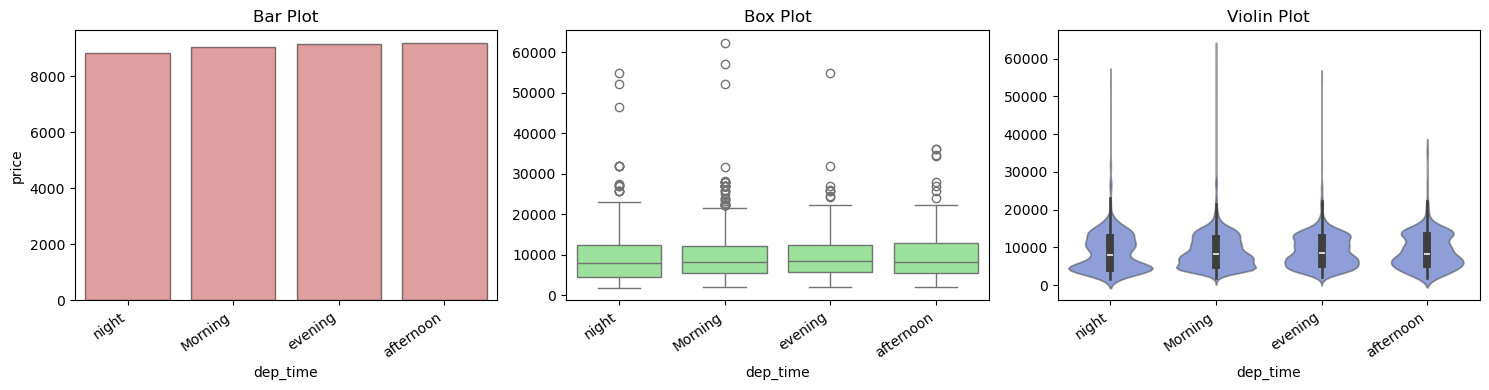

In [49]:
# bivariate analysis between dep_time and price

(
    train
    .assign(dep_time=lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4,12, inclusive="left"),
                   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
                   df_.dep_time.dt.hour.between(16,20, inclusive="left")],
                  ["Morning", "afternoon", "evening"],
                  default="night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

## 8.4 duration

In [50]:
train.duration

0         75
1       1775
2       1295
3       1330
4       1255
        ... 
6271    1925
6272     545
6273     300
6274     330
6275    1265
Name: duration, Length: 6276, dtype: int64

In [51]:
eda_helper_functions.num_summary(train, "duration")

0         75
1       1775
2       1295
3       1330
4       1255
        ... 
6271    1925
6272     545
6273     300
6274     330
6275    1265
Name: duration, Length: 6276, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,276 / 6,276 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,505.0
75,925.0
90,1440.0
95,1610.0
99,1855.0


,value
mean,633.123805
trimmed mean (5%),599.561062
trimmed mean (10%),570.697929
median,505.000000


,value
var,253646.395666
std,503.633196
IQR,755.000000
mad,340.000000
coef_variance,0.795473


,value
skewness,0.885991
kurtosis,-0.109222


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 8.984818636764567e-56
Test Statistic       : 0.885577778903996
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.752
Test Statistic       : 236.9969971674036
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


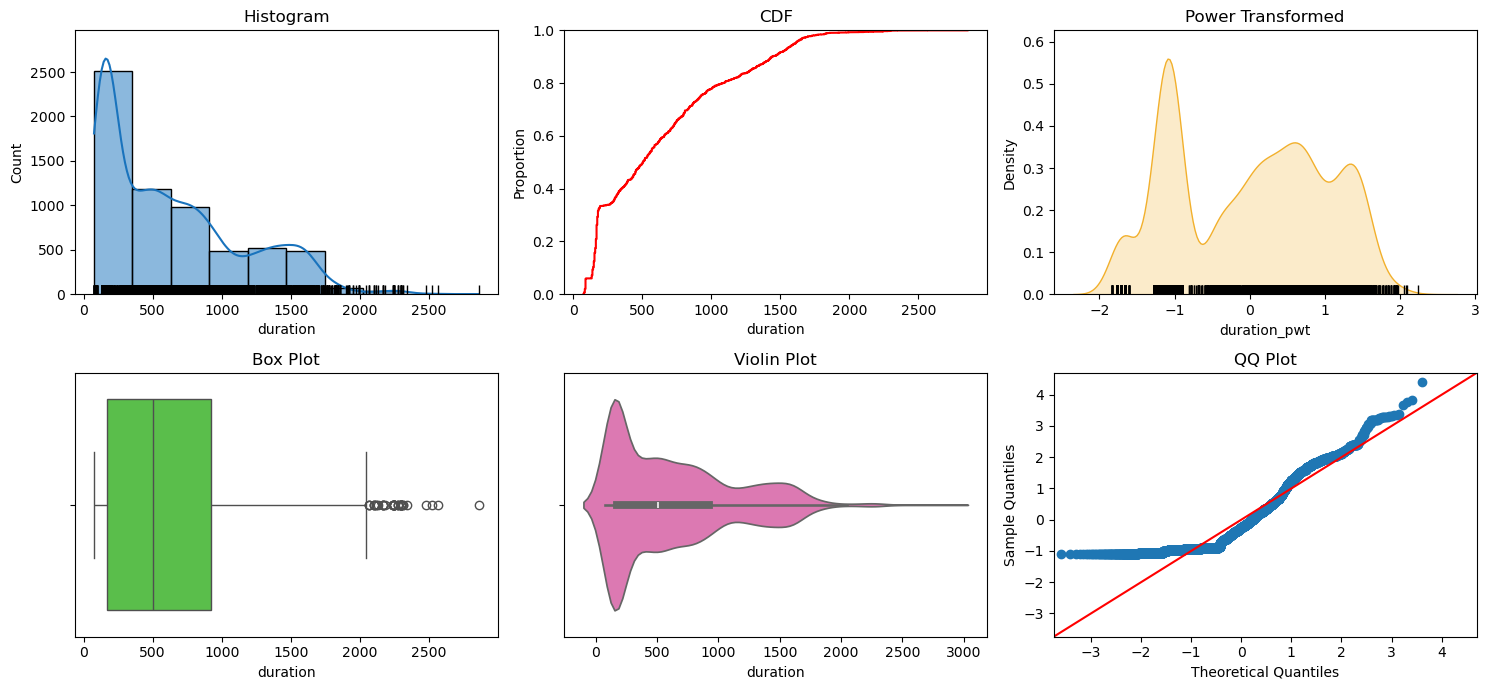

In [52]:
# getting univariate plots

eda_helper_functions.num_univar_plots(train, "duration")

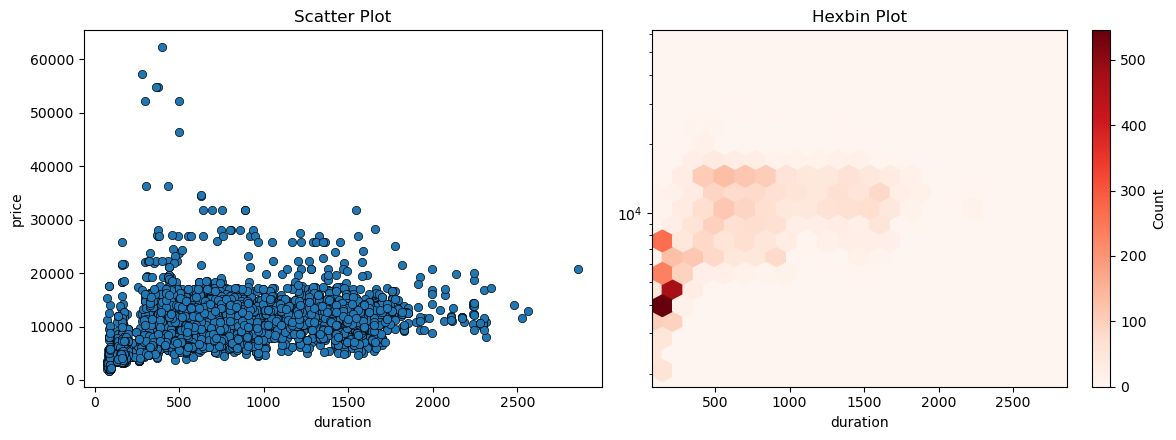

In [60]:
# bivariate analysis between duration and target(price)

eda_helper_functions.num_bivar_plots(
    data=train,
    var_x="duration",
    var_y="price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=20,
        cmap="Reds"
    )
)

In [61]:
# checking the relation between duration and price using hypothesis testing
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5066415460277521
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6988355126592192
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


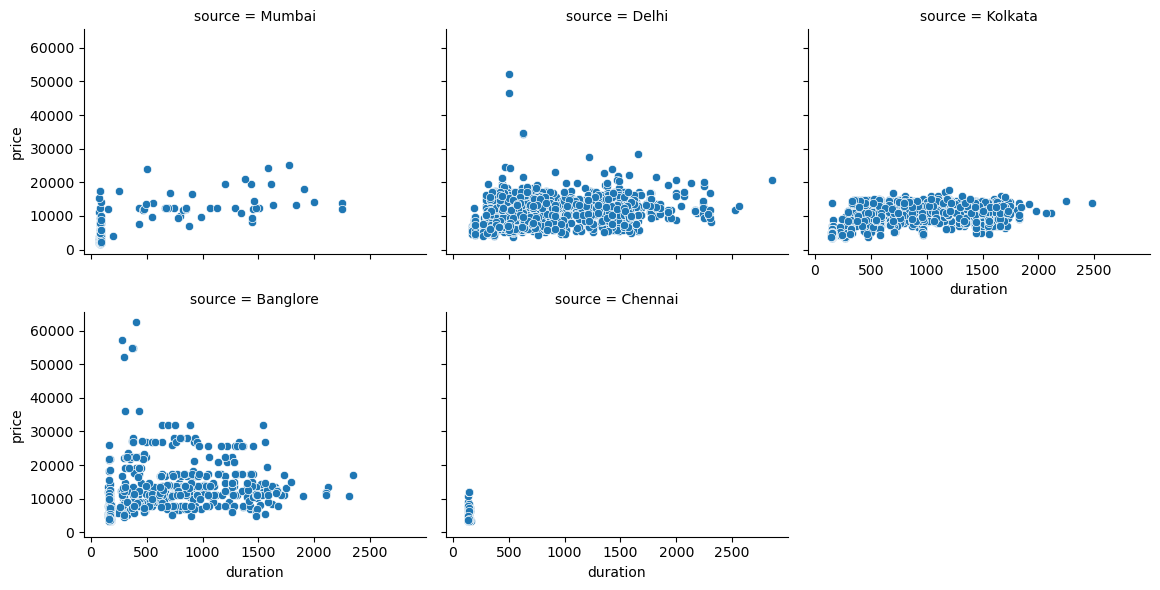

In [72]:
# multivariate analysis between duration, price, source and total_steps

duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    # hue="additional_info",
    sharey=True,
    col_wrap=3,
    aspect=1.3
)

duration_grid.map(sns.scatterplot, "duration", "price")

In [73]:
# cheking for outliers in duration

eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -962.5
Upper Limit : 2057.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
3271,Air India,2019-05-01,Kolkata,Banglore,2026-01-16 05:50:00,2026-01-16 16:15:00,2065,2.0,No Info,10991
2806,Jet Airways,2019-03-06,Delhi,Cochin,2026-01-16 17:55:00,2026-01-16 04:25:00,2070,2.0,In-Flight Meal Not Included,15812
5660,Jet Airways,2019-03-06,Delhi,Cochin,2026-01-16 17:55:00,2026-01-16 04:25:00,2070,2.0,No Info,17072
1098,Air India,2019-03-03,Banglore,New Delhi,2026-01-16 11:05:00,2026-01-16 22:10:00,2105,2.0,No Info,11948
4170,Air India,2019-03-18,Banglore,New Delhi,2026-01-16 11:05:00,2026-01-16 22:10:00,2105,2.0,No Info,11161
2571,Air India,2019-03-03,Banglore,New Delhi,2026-01-16 11:05:00,2026-01-16 22:10:00,2105,2.0,No Info,11791
2497,Air India,2019-05-12,Kolkata,Banglore,2026-01-16 12:00:00,2026-01-16 23:15:00,2115,3.0,No Info,10991
1751,Air India,2019-03-12,Banglore,New Delhi,2026-01-16 06:45:00,2026-01-16 18:05:00,2120,3.0,No Info,13387
686,Jet Airways,2019-03-06,Delhi,Cochin,2026-01-16 16:50:00,2026-01-16 04:25:00,2135,2.0,No Info,19907
3581,Air India,2019-03-06,Delhi,Cochin,2026-01-16 07:05:00,2026-01-16 19:15:00,2170,2.0,No Info,11552


## 8.5 total_stops

In [74]:
eda_helper_functions.num_summary(train, "total_stops")

0       0.0
1       2.0
2       2.0
3       1.0
4       2.0
       ... 
6271    2.0
6272    1.0
6273    1.0
6274    1.0
6275    1.0
Name: total_stops, Length: 6276, dtype: float64

Data Type      : float64
Missing Data   : 1 rows (0.02 %)
Available Data : 6,275 / 6,276 rows


,value
percentile,
0,0.0
5,0.0
10,0.0
25,0.0
50,1.0
75,1.0
90,2.0
95,2.0
99,2.0


,value
mean,0.800159
trimmed mean (5%),NaN
trimmed mean (10%),NaN
median,1.000000


,value
var,0.435033
std,0.659571
IQR,1.000000
mad,0.000000
coef_variance,0.824299


,value
skewness,0.306956
kurtosis,-0.474504


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.128708146607144e-67
Test Statistic       : 0.7907407135480665
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.752
Test Statistic       : 605.3945660385998
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


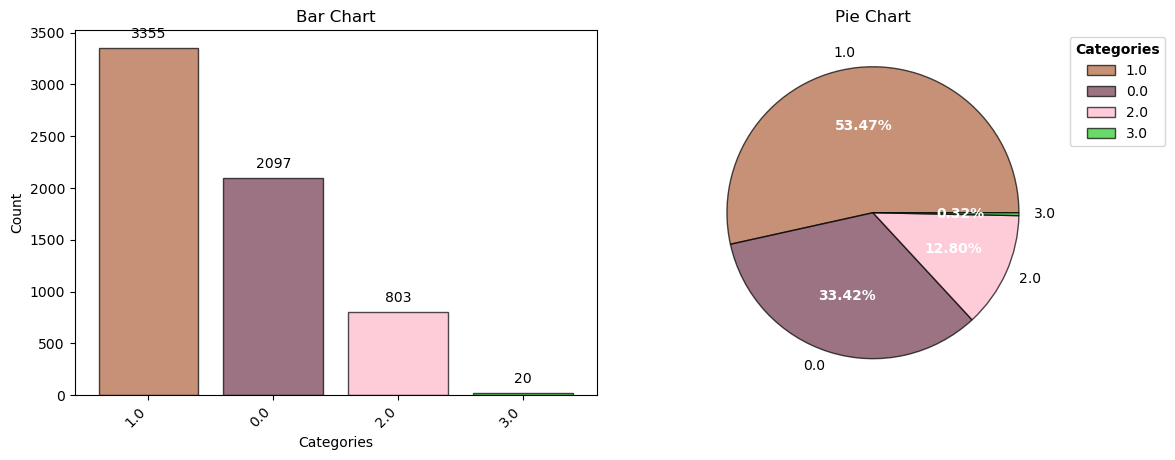

In [ ]:
# total stop is numerical but its behaviour is similar to categorical
eda_helper_functions.cat_univar_plots(train, "total_stops", show_wordcloud=False)

## 8.6 additional_info

In [79]:
eda_helper_functions.cat_summary(train, "additional_info")

0                           No Info
1                           No Info
2                           No Info
3       In-Flight Meal Not Included
4                           No Info
                   ...             
6271                        No Info
6272                        No Info
6273    In-Flight Meal Not Included
6274                        No Info
6275                 1 Long Layover
Name: additional_info, Length: 6276, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,276 / 6,276 rows


,
count,6276
unique,7
top,No Info
freq,4928


,count,percentage
category,,
No Info,4928,0.785214
In-Flight Meal Not Included,1132,0.180370
No Check-In Baggage Included,194,0.030911
1 Long Layover,15,0.002390
Change Airports,4,0.000637
Business Class,2,0.000319
Red-Eye Flight,1,0.000159


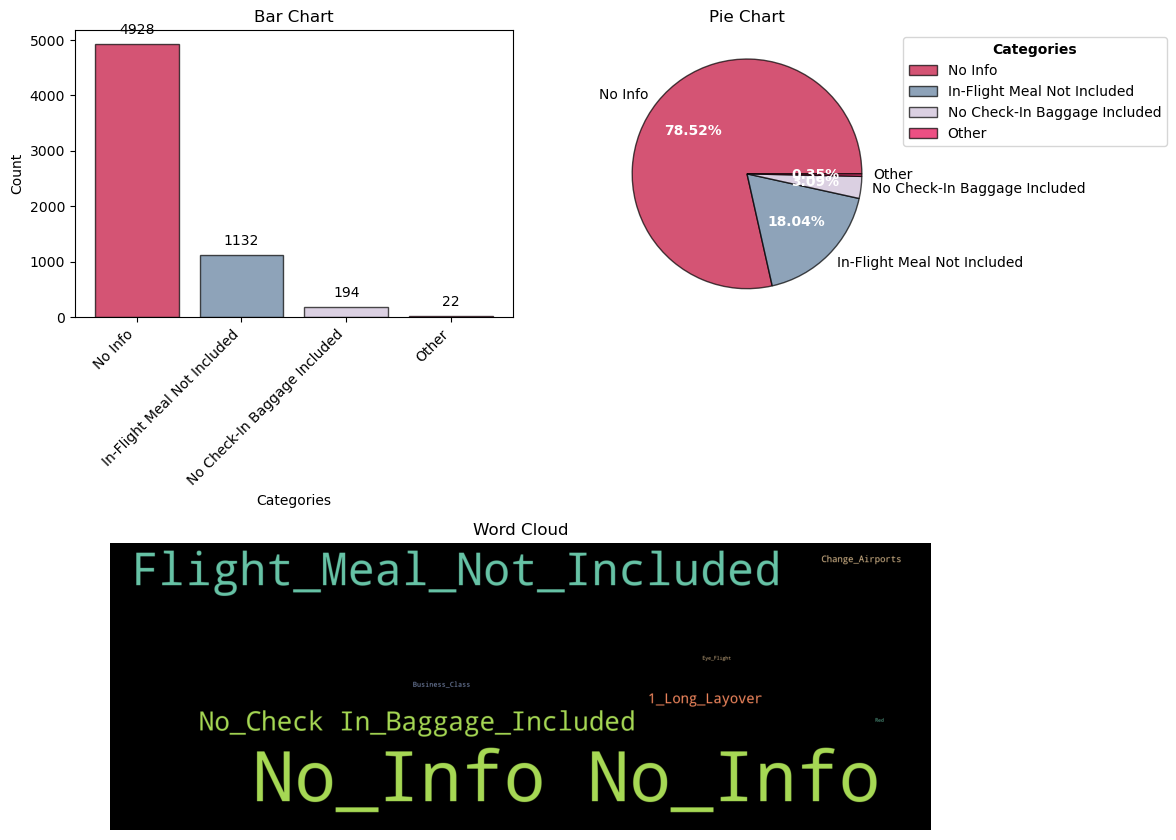

In [81]:
eda_helper_functions.cat_univar_plots(train, "additional_info", k=3)

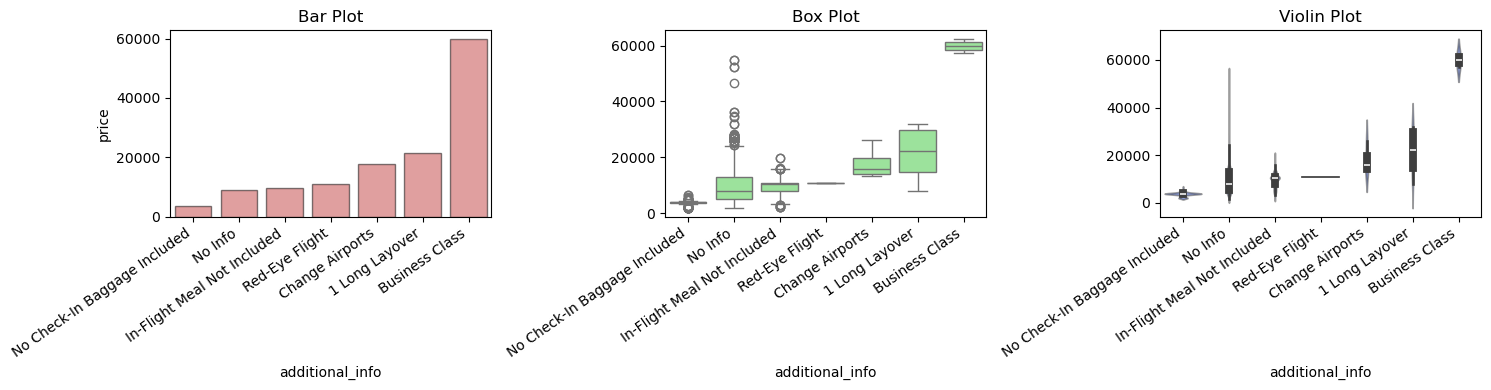

In [84]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

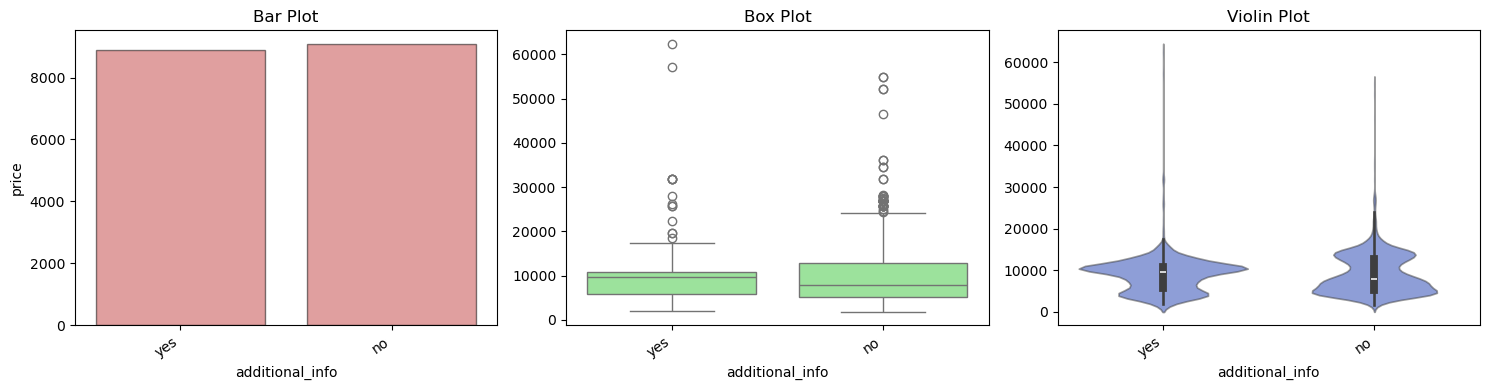

In [85]:
# converting additional_info to binary for the analysis

(
    train
    .assign(additional_info=(
        train
        .additional_info
        .pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

# 9. Automated EDA

In [ ]:
# using ydata profiling

# from ydata_profiling import ProfileReport 

# profile = ProfileReport(train, title="Data Profiling Report", explorative=True)
# profile.to_file("profile_report.html")